# Linear Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/riccardoberta/machine-learning/blob/master/02-supervised-learning/01-linear-models.ipynb)


1. [Linear Regression](#Linear-regression)
    - [Cost function](#Cost-function)
    - [The Normal Equation](#The-Normal-Equation)
2. [Gradient Descent](#Gradient-Descent)
    - [Gradient Estimation](#Gradient-Estimation)
    - [Batch Gradient Descent](#Batch-Gradient-Descent)
    - [Stochastic Gradient Descent](#Stochastic-Gradiend-Descent)
    - [Mini-batch Gradient Descent](#Mini-batch-Gradient-Descent)
3. [Polynomial regression](#Polynomial-regression)
4. [Bias-Variance Tradeoff](#Bias-Variance-Tradeoff)
5. [Regularized models](#Regularized-models)
    - [Ridge Regularization](#Ridge-Regularization)
    - [Lasso Regularization](#Lasso-Regularization)
    - [Elastic Net](#Elastic-Net)
    - [Early Stopping](#Early-Stopping)
6. [Logistic regression](#Logistic-regression)
7. [Softmax Regression](#Softmax-Regression)
8. [Exercise](#Exercise)

## Linear regression
A **linear regression model** makes a prediction by simply computing a **weighted sum of the input features**, plus a constant called the **bias term** (also called the intercept term):

$\hat{y}  =\theta_0 +\theta_1x_1+\theta_2x_2+...+\theta_nx_n$

- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the i feature value.
- $\theta_j$ is the j model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, ..., $\theta_n$).

This can be written much more concisely using a vectorized form:

$\hat{y}=h_\theta(x)= \theta^{T} x$

In this equation:
- $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and
the feature weights $\theta_1$ to $\theta_n$.
- $x$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always
equal to 1.
-  $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0 +\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
- $h$ is the **hypothesis function**, using the model parameters $\theta$.

### Cost function
In this way, we have defined a measure of how well the model fits the training data, called **Cost Function $J$**, normally we use the **Root Mean Square Error (RMSE)** in the linear case. So we need to find a value of $\theta$ that minimize RMSE (or MSE, which gives the same result, but it is simpler to minimize).

$\begin{align}
J(\theta) = \text{MSE}(X, h_\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}{(\hat{y}^{(i)}- y^{(i)})^2} = \frac{1}{m}\sum\limits_{i=1}^{m}{(\theta^{T}x^{(i)} - y^{(i)})^2 } = \frac{1}{m} (X\theta-y)^{T}(X\theta-y) 
\end{align}$

where $X$ is the training set of m instances.

### The Normal Equation
This cost function can be minimized using a **closed-form solution** (a mathematical equation that gives the result directly), called **Normal Equation**. Using some matrix transpose identities, we can simplify this a bit. We'll throw the \frac{1}2m} part away since we're going to compare a derivative to zero anyway:

$\begin{align}
J(\theta) = ((X \theta)^T - y^T)(X \theta - y)=(X \theta)^T X \theta - (X \theta)^T y - y^T(X \theta) + y^T y
\end{align}$

Note that $X \theta$ is a vector, and so is $y$. So when we multiply one by another, it doesn't matter what the order is (as long as the dimensions work out). So we can further simplify:

$\begin{align}
J(\theta)= \theta^T X^T X \theta - 2 (X \theta)^T y + y^T y
\end{align}$

Recall that here $\theta$ is our unknown. To find where the above function has a minimum, we will derive by $\theta$ and compare to 0. Deriving by a vector may feel uncomfortable, but there's nothing to worry about. Recall that here we only use matrix notation to conveniently represent a system of linear formulae. So we derive by each component of the vector, and then combine the resulting derivatives into a vector again ([more details](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)).  The result is:

$\begin{align}
\frac{\partial J}{\partial \theta} = 2 X^T X \theta - 2 X^T y = 0
\end{align}$

$\begin{align}
X^T X \theta = X^T y
\end{align}$

Now, assuming that the matrix $X^T X$ is invertible, we can multiply both sides by $(X^T X)^{-1}$ and get:

$\begin{align}
\hat{\theta} = (X^T X)^{-1} X^T y 
\end{align}$

where $(X^{T}X)^{-1}X^{T}$ is called **pseudoinverse** of $X$ and expressed as $X^{+}$

We can try this by generating some linear-looking data. We use y = 4 + 3x + gaussian
noise equation. Then we compute the $\hat{\theta}$ using the Normal Equation. In order to implement it we can use NumPy linear algebra module **linalg**.

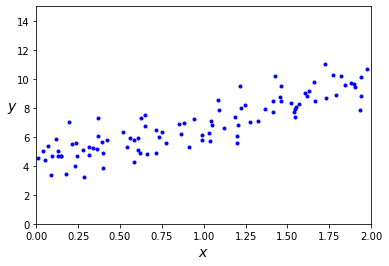

In [179]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [180]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $\theta_0= 4$ and $\theta_1= 3$. The result is close enough, but the noise made it impossible to recover the exact parameters of the original function. We can make plot the model predicions:

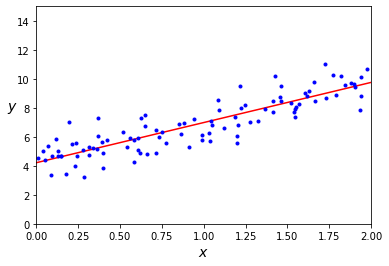

In [181]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)

plt.axis([0, 2, 0, 15])
plt.show()

We can perform linear regression using SciKit-Learn. It uses a more efficient approach to calculate the pseudoinverse $X^{+}$. This approach is more efficient and it handles edge cases nicely: the Normal Equation may not work if the matrix $X^{T}X$ is not invertible (singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

In [182]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [183]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The computational complexity of inverting such matrix is typically about $O(n^2)$ to $O(n^3)$, depending on the implementation. This gets very slow when the number of features grows large (e.g., 100,000), however the complexity is linear with regard to the number of instances in the training set ($O(m)$). So this method handle large training sets efficiently, provided they can fit in memory. Also, predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features. 

## Gradient Descent
Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory. Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The gradient (see the calculus notebook on math prerequisites), which is the vector of partial derivatives, gives the direction in which a function most quickly increases. Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, we can try to minimize a function by taking small steps in the opposite direction. So, the general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function. It measures the **local gradient** of the error function and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum! [Here](https://ruder.io/optimizing-gradient-descent/index.html) it is possible to read a really interesting overview on Gradient Descent. Concretely, we start by filling $\theta$ with random values (**random initialization**) then we improve it gradually, taking one small step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum.

<img src="images/gradient_descent.png" width="400">

An important parameter in Gradient Descent is the size of the steps, called the **learning rate hyperparameter**. If it is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if it is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge.

<img src="images/learning_rate_1.png" width="300"><img src="images/learning_rate_2.png" width="300">

Moreover, not all cost functions have just one minimun value, making convergence to the minimum difficult. Fortunately, the MSE cost function is **a convex function**, this implies that there are no **local minima**, just one **global minimum**. 
Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

<img src="images/local_minimum.png" width="400">

### Gradient Estimation

If the cost is a function $f$ of one variable, its derivative at a point $x$ measures how $f(x)$ changes when we make a very small change to $x$. The derivative is defined as the limit of the difference quotients:

In [130]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

The derivative is the slope of the tangent line at $(x,f(x))$, while the difference quotient is the slope of the not-quite tangent line that runs through $(x+h,f(x+h))$. As $h$ gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line. 

When $f$ is a function of many variables, it has multiple partial derivatives, each indicating how $f$ changes when we make small changes in just one of the input variables. We need to compute the gradient of the function with regard to each variables. In other words, we need to calculate how much the cost function will change if we change a variable just a little bit. The **gradient vector**, noted $\nabla f(x)$, contains all the partial derivatives of the cost function.

$\begin{align}
\nabla_\theta f(x)= \begin{pmatrix} \frac{\partial }{\partial x_0} f(x) \\ \frac{\partial }{\partial x_2} f(x) \\ \vdots \\ \frac{\partial }{\partial x_n} f(x) \end{pmatrix} 
\end{align}$

We calculate its $i_{th}$ partial derivative by treating it as a function of just its $i_{th}$ variable, holding the other variables fixed:

In [131]:
def partial_difference_quotient(f, v, i, h):
    """Returns the i-th partial difference quotient of f at v"""
    # add h to just the ith element of v
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

The, we can estimate the gradient:

In [132]:
def estimate_gradient(f, v, h = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

Now let's use gradients to find the minimum among all n-dimensional vectors. We’ll just pick a random starting point x_0 and then take tiny steps in the opposite direction of the
gradient until we reach a point where the gradient is very small: subtract $\nabla f(x)$ from $x_0$ using a factor $\eta$, called **learning rate** to  determine the size of the downhill step.

$\begin{align}
x^{next} = x - \eta \nabla f(x)
\end{align}$

Let's implement it in python:

In [184]:
def add(v, w):
    """Adds corresponding elements"""
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def gradient_step(v, gradient, step_size):
    """Moves step_size in the gradient direction from v"""
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

As a simple example, suppose we have a function $f$ that takes as input a vector of real numbers and outputs a single real number, like this one:

In [185]:
def dot(v, w):
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def f(v):
    return dot(v, v)

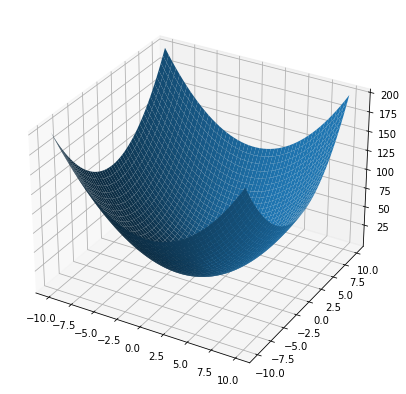

In [187]:
from mpl_toolkits.mplot3d import Axes3D

X1 = np.linspace(-10, 10, 50)
X2 = np.linspace(-10, 10, 50)
X1, X2 = np.meshgrid(X1, X2)
F = f([X1, X2])

figure = plt.figure(1, figsize = (10, 7))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X1, X2, F)
plt.show()

It’s easy to see that the function $f$ is smallest when its input $v$ is a vector of zeros. But imagine we didn’t know that. Let’s use gradients to find the minimum. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [210]:
import random
path=[]

# pick a random starting point
v = [10, 10]
path.append(v)

for epoch in range(100):
    grad = estimate_gradient(f, v)
    v = gradient_step(v, grad, -0.1)
    path.append(v)
    
print(v)

[-4.999796295383849e-05, -4.999796295383849e-05]


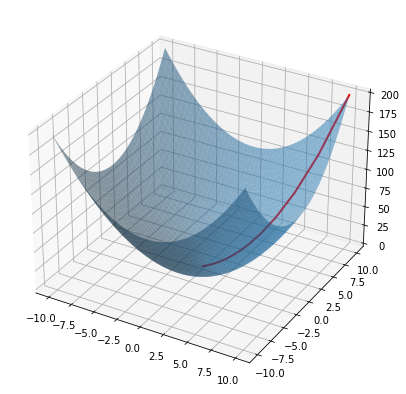

In [211]:
X1_path = [point[0] for point in path]
X2_path = [point[1] for point in path]
F_path = [f(point) for point in path]

figure = plt.figure(1, figsize = (10, 7))
ax = figure.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, alpha=0.5)
ax.plot(X1_path, X2_path, F_path, 'r', linewidth=2)
plt.show()

A major drawback of our approach is that **it’s computationally expensive**. If $v$ has length $n$, the gradient estimation has to evaluate $f$ on $2n$ different inputs. If we’re repeatedly estimating gradients (as in the algorithms), we’re doing a whole lot of work.

### Batch Gradient Descent

Now, let's apply the Gradient Descent idea to fit the linear model. We need to compute the gradient of the cost function with regard to each model parameter $\theta_j$. Notice that this involves calculations **over the full training set X**, at each step! This is why the algorithm is called **Batch Gradient Descent (BGD)**: it uses the whole batch of training data at every step. It is really slow on large training sets.

In [212]:
import random

path_BGD=[]

def J(theta):
    m = len(X_b)
    a = (X_b.dot(theta))
    a = a-y.T
    return (1/m * a.dot(a.T))[0][0]

# pick a random starting point
theta = [80, 80]
path_BGD.append(theta)

for epoch in range(10000):
    grad = estimate_gradient(J, theta)
    theta = gradient_step(theta, grad, -0.01)
    path_BGD.append(theta)
    
print(theta)

[4.215085651634302, 2.7700713876036853]


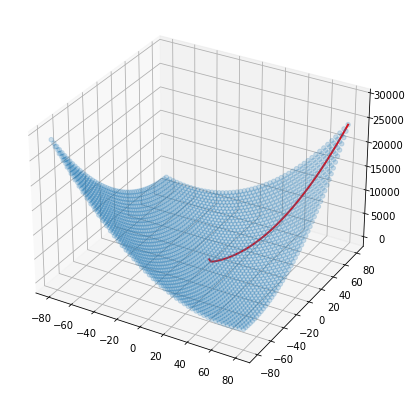

In [213]:
Theta1 = np.linspace(-80, 80, 50)
Theta2 = np.linspace(-80, 80, 50)
X1, X2 = np.meshgrid(Theta1, Theta2)
F = [J([x,y]) for x in Theta1 for y in Theta2]

X1_path = [point[0] for point in path_BGD]
X2_path = [point[1] for point in path_BGD]
F_path = [J(point) for point in path_BGD]

figure = plt.figure(1, figsize = (10, 7))
ax = plt.subplot(111, projection='3d')
ax.scatter3D(X1, X2, F, '.', alpha=0.2)
ax.plot(X1_path, X2_path, F_path, 'r', linewidth=2)
plt.show()

That’s exactly what the Normal Equation found! BGD worked perfectly. But what if you had used a different learning rate?

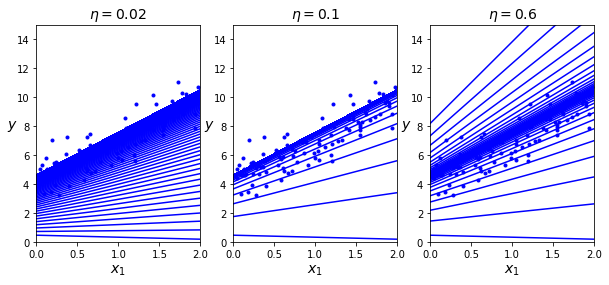

In [215]:
def plot_gradient_descent(theta, eta):
    plt.plot(X, y, "b.")
    m = len(X_b)
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "b-")
        gradients = estimate_gradient(J, theta)
        theta = gradient_step(theta, gradients, -eta)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$y$", rotation=0, fontsize=14)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=14)
    
plt.figure(figsize=(10,4))

np.random.seed(42)
theta = np.random.randn(2,1)

plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.6)

plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. To find a good learning rate, we can use grid search. We may wonder how to set the number of iterations. If it is too low, we will still be far away from the optimal solution when the algorithm stops; but if it is too high, we will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny (when its norm becomes smaller than a tiny number $\epsilon$).

One drawback of this approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters. In this case it was fine, because our dataset was "small" and the gradient computation was "cheap". Real models, however, will frequently have large datasets and expensive gradient computations. In that case we’ll want to take gradient steps more often.

### Stochastic Gradiend Descent

At the opposite extreme, **Stochastic Gradient Descent (SGD)** picks a random instance in the training set at every step an computes the gradients based only on that single instance. This makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration. On the other hand, due to its stochastic nature, it is much less regular: instead of gently decreasing to the minimum, the cost function will bounce up and down, decreasing only on average. So once the algorithm stops, the final **parameter values are good, but not optimal**.

<img src="images/batch_gradient_descent.png" width="300"><img src="images/stochastic_gradient_descent.png" width="300">

When the cost function is very irregular, this can actually help the algorithm **jump out of local minima**. Randomness is good to escape from local optima, but bad because the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The step starts large (to escape local minima), then get smaller (to settle at the global minimum). The function that determines the learning rate at each iteration is called the **learning schedule**. We can implements SGD using a simple learning schedule. By convention we iterate by several rounds of iterations, each round is called an **epoch**.

In [223]:
import random

path_SGD=[]

def J_stocastic(theta):
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    a = (xi.dot(theta))
    a = a-yi.T
    return (a.dot(a.T))[0][0]

# pick a random starting point
theta = [80, 80]
path_SGD.append(theta)

n_epochs = 2500
for epoch in range(n_epochs):
    random_index = np.random.randint(len(X_b))
    for i in range(len(X_b)):
        grad = estimate_gradient(J_stocastic, theta)
        theta = gradient_step(theta, grad, -0.01)
        path_SGD.append(theta)
    
print(theta)

[3.625243807942303, 1.8080485479595458]


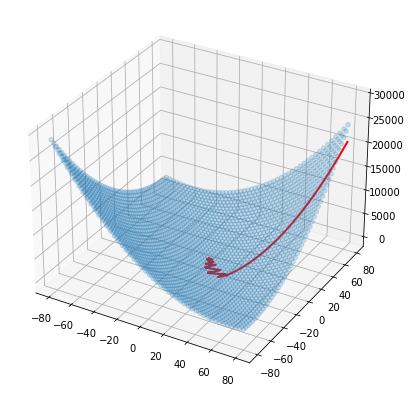

In [221]:
X1_path = [point[0] for point in path_SGD]
X2_path = [point[1] for point in path_SGD]
F_path = [J_stocastic(point) for point in path_SGD]

figure = plt.figure(1, figsize = (10, 7))
ax = plt.subplot(111, projection='3d')
ax.scatter3D(X1, X2, F, '.', alpha=0.2)
ax.plot(X1_path, X2_path, F_path, 'r', linewidth=2)
plt.show()

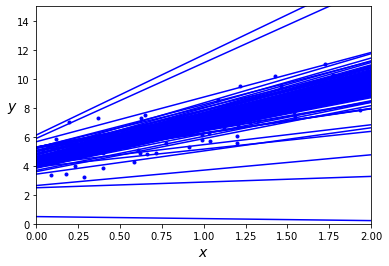

[array([4.17740728]), array([2.83557944])]


In [224]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 5,10  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

m = len(X_b)
n_epochs = 5
for epoch in range(n_epochs):
    for i in range(m):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        eta = learning_schedule(epoch * m + i)        
        gradients = estimate_gradient(J_stocastic, theta)
        theta = gradient_step(theta, gradients, -eta)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x$", fontsize=14)                     
plt.ylabel("$y$", rotation=0, fontsize=14)           
plt.axis([0, 2, 0, 15])                              
                               
plt.show()

print(theta)

While the BGD code iterated 1,000 times through the whole training set, SGD code goes through the training set only 5 times and reaches a pretty good solution.

Scikit-Learn has a linera regressot based on SGD in its **SGDRegressor** class:

In [225]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,   # runs for maximum 1,000 epochs
                       tol=1e-3,        # or until loss drops 0.001
                       penalty=None,    # does not use regularization
                       eta0=0.1,        # starts with a learning rate of 0.1
                       random_state=42)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.24365286] [2.8250878]


### Mini-batch Gradient Descent
At each step, instead of computing the gradients based on the full training set (as in BGD) or based on just one instance (as in SGD), **Mini-batch Gradient Descent (MGD)** computes the gradients on small random sets of instances called **mini-batches**. The progress in parameter space is less erratic, especially with fairly large mini-batches. As a result, MGD will end up walking around a bit closer to the minimum than SGD, but it may be harder for it to escape from local minima.
We can implement MGD similar to SGD:

In [226]:
import random

minibatch_size=10
path_MGD=[]

def J_minibatch(theta):
    xi = X_b_shuffled[0:0+minibatch_size]
    yi = y_shuffled[0:0+minibatch_size]
    a = (xi.dot(theta))
    a = a-yi.T
    return (1/minibatch_size * a.dot(a.T))[0][0]

# pick a random starting point
theta = [80, 80]
path_MGD.append(theta)

n_epochs = 250
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(len(X_b)):
        grad = estimate_gradient(J_minibatch, theta)
        theta = gradient_step(theta, grad, -0.001)
        path_MGD.append(theta)
    
print(theta)

[4.0412466469623105, 2.6783724322476568]


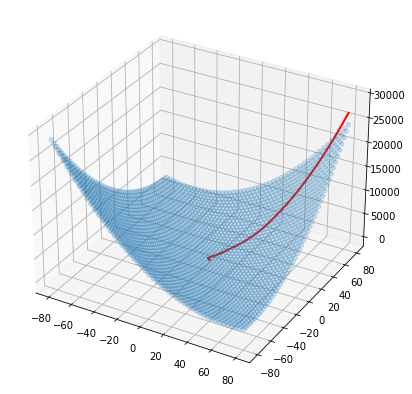

In [227]:
X1_path = [point[0] for point in path_MGD]
X2_path = [point[1] for point in path_MGD]
F_path = [J_minibatch(point) for point in path_MGD]

figure = plt.figure(1, figsize = (10, 7))
ax = plt.subplot(111, projection='3d')
ax.scatter3D(X1, X2, F, '.', alpha=0.2)
ax.plot(X1_path, X2_path, F_path, 'r', linewidth=2)
plt.show()

In order to visualize the different behaviour of BGD, SGD and MGD, we can show the paths taken by the three algorithms in parameter space during training:

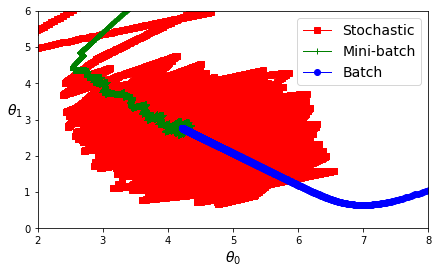

In [228]:
theta_path_bgd = np.array(path_BGD)
theta_path_sgd = np.array(path_SGD)
theta_path_mgd = np.array(path_MGD)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$   ", fontsize=14, rotation=0)
plt.axis([2, 8, 0, 6])
plt.show()

They all end up near the minimum, but BGD path actually stops at the minimum, while both SGD and MGD continue to walk around. However, BGD takes a lot of time to take each step, and SGD and MGD would also reach the minimum if you used a good learning schedule.

## Polynomial regression
What if the data are more complex than a straight line? We can use a linear model also to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**. For example, the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n_{th}$ degree polynomial in $x$:

$\begin{align}
\hat{y}  =\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + ... + \theta_n x^n = \sum\limits_{i=0}^{n}{\theta_i x^i}
\end{align}$

Let’s look at an example with some nonlinear data, based on a simple quadratic equation plus noise.

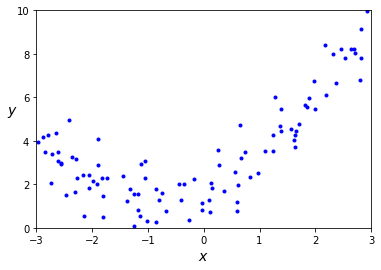

In [161]:
m = 100
np.random.seed(42)

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

Clearly, a straight line will never fit this data properly. So we can use Scikit-Learn’s **PolynomialFeatures** class to transform our training data, adding the square  of each feature in the training set as a new feature:

In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


X_poly now contains the original feature of X plus the square of this feature. Now we can fit a LinearRegression model to this extended training data:

[1.78134581] [[0.93366893 0.56456263]]


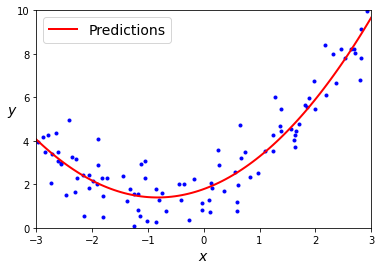

In [162]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

The model estimates $\hat{y} = 0.56 x^2 + 0.93 x + 1.78$ when in fact the original function was $y = 0.5 x^2 + x + 2.0 + noise$. Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features, this is made possible by the fact that PolynomialFeatures also adds **all combinations of features** up to the given degree.  For example, if there were two features $a$ and $b$, PolynomialFeatures with degree=3 would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2 b$, and $ab^2$. So, beware of the combinatorial explosin of features! If you perform high-degree Polynomial Regression, you will likely fit the training data much better. For example, in the following we apply a 300-degree polynomial model and compare it with a pure linear model and a quadratic model:

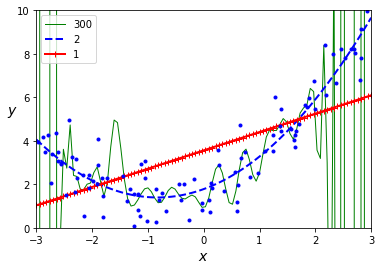

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
regressor = LinearRegression()

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    features = PolynomialFeatures(degree=degree, include_bias=False)
    regression = Pipeline([ ("features", features),
                            ("scaler", scaler), 
                            ("regressor", regressor) ])
    regression.fit(X, y)
    y_new = regression.predict(X_new)
    plt.plot(X_new, y_new, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

The high-degree polynomial model is **severely overfitting** the training data, while the linear model is **underfitting** it. The model that will generalize best in this case is the quadratic model.

## Bias-Variance Tradeoff
In general, how can we decide how complex the model should be? One way is to use cross-validation: if a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting; if it performs poorly on both, then it is underfitting. Another way is to look at the **learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, train the model several times on different sized subsets of the training set: 

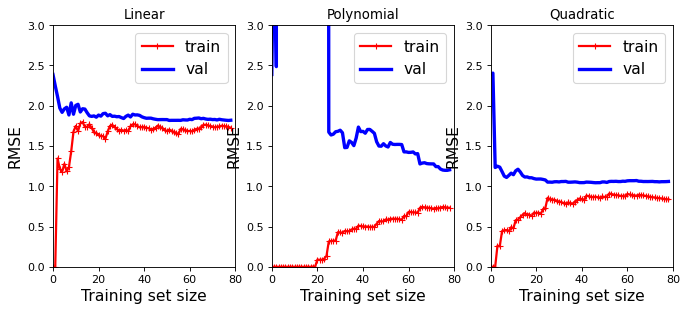

In [164]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

linear_regression = LinearRegression()
quadratic_regression = Pipeline([ ("features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("lin_reg", LinearRegression()) ])
polynomial_regression = Pipeline([ ("features", PolynomialFeatures(degree=20, include_bias=False)),
                                   ("lin_reg", LinearRegression()) ])

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(131); plot_learning_curves(linear_regression, X, y)
plt.title("Linear")
plt.axis([0, 80, 0, 3])             
plt.subplot(132); plot_learning_curves(polynomial_regression, X, y)
plt.title("Polynomial")
plt.axis([0, 80, 0, 3])  
plt.subplot(133); plot_learning_curves(quadratic_regression, X, y)
plt.title("Quadratic")
plt.axis([0, 80, 0, 3])

plt.show()      

First, let’s look at the performance of the linear model on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better. 

Now let’s look at the performance of the linear model on the validation data. When the
model is trained on very few training instances, it is incapable of generalizing
properly, which is why the validation error is initially quite big. Then, as the
model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve. These learning curves are **typical of a model that’s underfitting: both curves have reached a plateau; they are close and fairly high**.

Now let's look  at the curves of the polynomial model, these learning curves look a bit similar to the previous, but there is an important differences: the error on the training data is much lower, but there is a gap between the curves. This means that the model performs **significantly better on the training data than on the validation data, which is the hallmark of overfitting**. 

In the curves of the quadratic model we don't have the gap (differently from the overfitting case) and the error is lower (than in the underfitting case).

The model’s generalization error can be expressed as the sum of three different contributions:
- **Bias** is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
- **Variance**  is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.
- **Irreducible error** is due to the noisiness of the data itself. The only way to
reduce it is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

For example, a simple linear model will make a lot of mistakes for pretty much any training set (drawn from the same non linear population), which means that it has a high bias. However, any two randomly chosen training sets should give pretty similar models (since any two randomly chosen training sets should have pretty similar average values). So we say that it has a low variance. High bias and low variance typically correspond to underfitting. On the other hand, a higly non linear complex model will probably fit a linear training set perfectly. It has very low bias, but very high variance (since any two training sets would likely give rise to very different models). This corresponds to overfitting.

Increasing model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a [**trade-off**](https://www.youtube.com/watch?v=EuBBz3bI-aA).

<img src="images/bias-variance.png" width="900">

## Regularized models
A good way to reduce overfitting is to regularize the model (constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge Regularization
**Ridge Regularization** (also called **Tikhonov regularization**) adds a term equal to $\alpha \frac{1}{2} \Sigma_{i=1}^{n}\theta^2_i$ to the cost function. This forces the learning algorithm to not only fit the data but also **keep the model weights as small as possible**. Note that the regularization term should only be added to the cost function during training, not to evaluate it. The hyperparameter $\alpha$ controls how much we want to regularize the model.

$\begin{align}
J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum\limits_{i=1}^{n}\theta^2_i
\end{align}$

Note that the bias term $\theta_0$ is not regularized. As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. It is important to scale the data before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models. We can show the effect of Rigde regularizaion on a polynomial model (degree=10) using different value of $\alpha$:

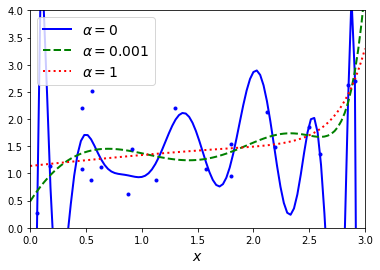

In [166]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

alphas=(0, 0.001, 1)
for alpha, style in zip(alphas, ("b-", "g--", "r:")):
    ridge_reg = Ridge(alpha=alpha, random_state=42) 
    model = Pipeline([ ("features", PolynomialFeatures(degree=14, include_bias=False)),
                       ("std_scaler", StandardScaler()),
                       ("regul_reg", ridge_reg) ])
    model.fit(X, y.ravel())
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.axis([0, 3, 0, 4])

plt.show()

Note how increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

### Lasso Regularization
**Least Absolute Shrinkage and Selection Operator Regularization** (usually simply
called **Lasso Regularization**) adds a regularization term to the cost function
using the $\ell$ norm of the weight vector.

$\begin{align}
J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum\limits_{i=1}^{n}\left|\theta_i\right| 
\end{align}$

We can replaces Ridge models with Lasso models in the same exmaple:

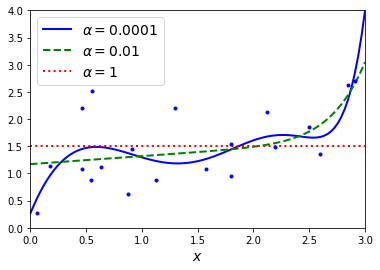

In [20]:
from sklearn.linear_model import Lasso

alphas=(0.0001, 0.01, 1)
for alpha, style in zip(alphas, ("b-", "g--", "r:")):
    lasso_reg = Lasso(alpha, max_iter=1000000) 
    model = Pipeline([ ("features", PolynomialFeatures(degree=10, include_bias=False)),
                       ("std_scaler", StandardScaler()),
                       ("regul_reg", lasso_reg) ])
    model.fit(X, y)
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.axis([0, 3, 0, 4])

plt.show()

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features: it automatically performs **feature selection** and outputs a sparse model.

### Elastic Net
**Elastic Net** is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both regularization terms, and you can control the mix ratio $r$. 

$\begin{align}
J(\theta) = \textMSE(\theta) + r \alpha \sum\limits_{i=1}^{n}\left|\theta_i\right| + \frac{1-r}{2} \alpha \sum\limits_{i=1}^{n}\theta^2_i
\end{align}$


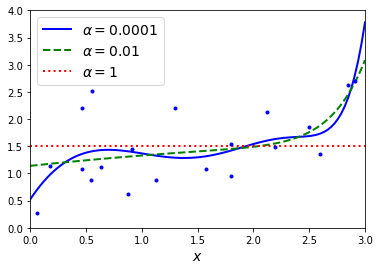

In [167]:
from sklearn.linear_model import ElasticNet

alphas=(0.0001, 0.01, 1)
for alpha, style in zip(alphas, ("b-", "g--", "r:")):
    elastic_reg = ElasticNet(alpha, l1_ratio=0.5, max_iter=1000000) 
    model = Pipeline([ ("features", PolynomialFeatures(degree=10, include_bias=False)),
                       ("std_scaler", StandardScaler()),
                       ("regul_reg", elastic_reg) ])
    model.fit(X, y)
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x$", fontsize=14)
plt.axis([0, 3, 0, 4])

plt.show()

So when should we use plain Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable to have **at least a little bit of regularization**, so generally we should avoid plain Linear Regression. Ridge is a good default, but if we suspect that only a few features are useful, we should prefer Lasso or Elastic Net, because they tend to reduce the useless features’ weights down to zero. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

### Early Stopping
A very different way to regularize iterative learning algorithms (such as Gradient Descent) is to stop training as soon as the validation error reaches a minimum. This is called **early stopping**.  In the following, a complex model (high-degree Polynomial Regression model) is being trained with BGD. As the epochs go the  prediction error on the training/validation set goes down. After a while, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

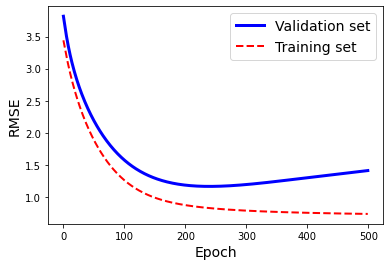

In [168]:
from copy import deepcopy

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), 
                                                  test_size=0.5, random_state=10)

poly_scaler = Pipeline([ ("features", PolynomialFeatures(degree=90, include_bias=False)),
                         ("scaler", StandardScaler()) ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

best_epoch = None
best_model = None
train_errors, val_errors = [], []
minimum_val_error = float("inf")
n_epochs = 500
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

## Logistic regression
Some "regression" algorithms can be used for classification (and vice versa). **Logistic Regression** (also called **Logit Regression**) is used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a **binary classifier**. The Logistic Regression model computes a weighted sum of the input features (plus a bias term) and outputs the logistic of this result:

$\hat{p}=h_\theta(x)= \sigma(x^{T}\theta)$

The logistic ($\sigma()$) is a sigmoid function that outputs a number between 0 and 1 

$\begin{align}
\sigma(t) = \frac{1}{1+e^{-t}}
\end{align}$

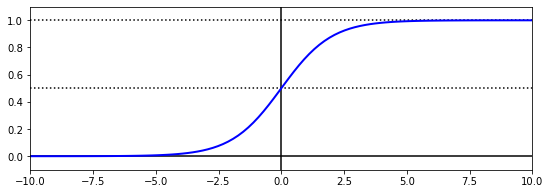

In [169]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Once the model has estimated the probability that the prediction is:

$\hat{y} = 
\begin{cases}
    0 & \text{if} & \hat{p}\lt 0.5 \\
    1 & \text{if} & \hat{p}\geq 0.5 \\
\end{cases}$

The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). We can define the following cost function:

$\begin{align}
J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^{m} [y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]
\end{align}$


Considering a single instance $i$, this makes sense because: 
- log(x) grows very large when x approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance;
- log(x) is close to 0 when x is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

<img src="images/cost-function-logistic-regression.png" width="800">

The cost function over the whole training set is the average cost over all training instances.

It is convex function, so Gradient Descent is guaranteed to find the global minimum. The partial derivatives of the cost function are:

$\begin{align}
\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum\limits_{i=1}^{m} ((\theta^{T}x^{(i)})-y^{(i)})x^{(i)}_{j}
\end{align}$

Here we can find the derivation of this formula [link](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d). Once we have the gradient vector containing all the partial derivatives, we can use it in the BGD\SGD or MGD algorithms.

We will use the **Iris dataset** to illustrate Logistic Regression. [Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a dataset containing the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature.

In [171]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the dataset
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

/Users/riccardo.berta/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


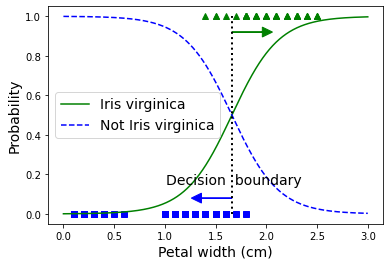

In [173]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Let’s look at the model’s estimated probabilities for flowers with petal widths
# varying from 0 cm to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

# Plot the flowers
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

# Plot the information about decision
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.show()

The petal width of Iris virginica ranges from 1.4 cm to 2.5 cm, while the other iris flowers generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice
that there is a bit of overlap: 
- above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class)
- below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). 
- in between the classifier is unsure. 

There is a **decision boundary** at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident).

In [28]:
print(log_reg.predict([[1.65], [1.55]]))
print(log_reg.predict_proba([[1.65], [1.55]]))

[0 0]
[[0.51127777 0.48872223]
 [0.61737641 0.38262359]]


We can use two features: petal width and length and retrain the logistic regressor:

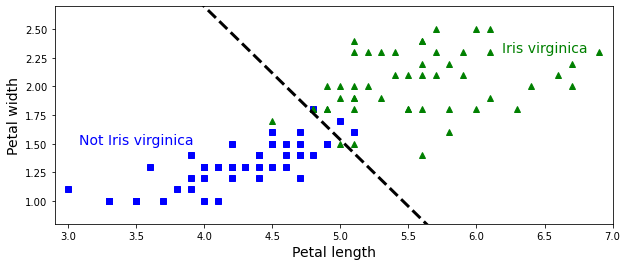

In [175]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Just like the other linear models, Logistic Regression models can be regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression** (or **Multinomial Logistic Regression**). The idea is simple: when given an instance $x$, the model first computes a score $s_k (x)$ for each class $k$, using the linear regression formula (where each class has its own parameter vector):

$s_k(x) = x^{T}\theta^{(k)}$

then estimates the probability that the instance belongs to class $k$ ($\hat{p}_k$) by applying the **softmax function** to the score:

$\begin{align}
\hat{p}_k = \sigma (s(x))_k = \frac{e^{s_k(x)}}{\sum\limits_{i=1}^{K} e^{s_j(x)}}
\end{align}$

where
- $K$ is the number of classes
- $s(x)$ is a vector containing the scores of each class for the instance $x$
- $\sigma(s(x))$ is the estimated probability that the instance $x$ belongs to class $k$

<img src="images/softmax.png" width="500">

The classifier predicts the class with the highest estimated probability:

$\hat{y} = \underset{k}{\text{argmax}}(\sigma(s(x)_k))= \underset{k}{\text{argmax}}(((\theta^{(k)})^{(T)}x))$

This classifier predicts only one class at a time (it is multiclass, not multioutput), so it should be used only with mutually exclusive classes.

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes), we can use as cost function the [**cross entropy**](https://www.youtube.com/watch?v=ErfnhcEV1O8):

$\begin{align}
J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} y^{(i)}_k\log(\hat{p}^{(i)}_k)
\end{align}$

Notice that when there are just two classes (K = 2), this cost function is
equivalent to the Logistic Regression’s cost function.

The gradient vector of this cost function is given by:

$\begin{align}
\nabla_{\theta^{(k)}}J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} (\hat{p}^{(i)}_k-y^{(i)}_k)x^{(i)}
\end{align}$

Now we can compute the gradient vector for every class, then use BGD (or any other optimization algorithm) to find the parameter matrix $\theta$ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s LogisticRegression uses **one-versus-the-rest** by default, but we can set the **multi_class** hyperparameter to "multinomial" to switch it to Softmax Regression.

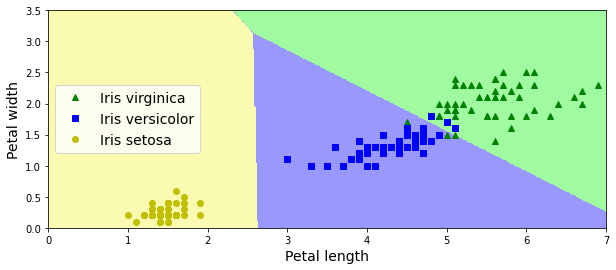

In [176]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

The figure shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear.

## Exercise

**1 - Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)**

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [63]:
np.random.seed(2042)

# Laod dataset

X = iris["data"][:, (2, 3)]
X_with_bias = np.c_[np.ones([len(X), 1]), X]
y = iris["target"]

# Splitting dataset

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

# Define number of inputs and outputs

n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [64]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\begin{align}
\sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum\limits_{i=1}^{K} e^{s_j(x)}}
\end{align}$

In [65]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

So the equations we will need are the cost function:

$J(\mathbf{\theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

and the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [79]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    p_k = softmax(X_train.dot(Theta))
    loss = -np.mean(np.sum(y_train_one_hot * np.log(p_k + epsilon), axis=1))
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(p_k - y_train_one_hot)
    Theta = Theta - eta * gradients

0 4.742639033914859
500 0.7216880823119456
1000 0.6204887212670228
1500 0.5578624004739455
2000 0.5145425566126579
2500 0.4821902740010116
3000 0.4566988357061258
3500 0.43582117185672764
4000 0.41822219905237085
4500 0.4030556709445119
5000 0.3897567987663698


And that's it! The Softmax model is trained. Let's make some predictions:

In [80]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Now let's add early stopping and regularization. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [84]:
eta = 0.01
n_iterations = 50001
m = len(X_train)
epsilon = 1e-7
best_loss = np.infty
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    p_k = softmax(X_train.dot(Theta))
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(p_k + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss    
    gradients = 1/m * X_train.T.dot(p_k - y_train_one_hot) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    p_k = softmax(X_valid.dot(Theta))
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(p_k + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 3.5999338639176255
500 0.7569097460308739
1000 0.6850520740929845
1500 0.6447975808183839
2000 0.6197262287043536
2500 0.6027584914648717
3000 0.5905257211100674
3500 0.5812773062987413
4000 0.5740303832182354
4500 0.5681953000947405
5000 0.5633978769017607
5500 0.5593891282343846
6000 0.5559965519912371
6500 0.5530964239505898
7000 0.5505973080625064
7500 0.5484298505741196
8000 0.5465402446255669
8500 0.5448859175185952
9000 0.5434326069425048
9500 0.5421523296564554
10000 0.5410219381269876
10500 0.5400220734447219
11000 0.5391363910070013
11500 0.5383509776595119
12000 0.5376539057091296
12500 0.5370348864801
13000 0.5364849974445813
13500 0.5359964645647621
14000 0.5355624866606017
14500 0.5351770921951957
15000 0.5348350213790023
15500 0.5345316282784913
16000 0.5342627989005737
16500 0.5340248821625225
17000 0.5338146313502717
17500 0.5336291541859886
18000 0.5334658700172721
18500 0.5333224729392765
19000 0.5331968998916753
19500 0.5330873029520141
20000 0.532992025188187
205

In [85]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still good, but faster.

Now let's plot the model's predictions on the whole dataset:

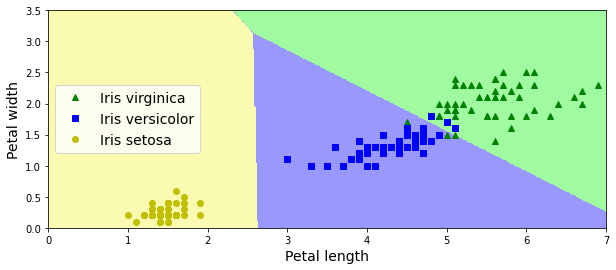

In [86]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

And now let's measure the final model's accuracy on the test set:

In [87]:
logits = X_test.dot(Theta)
y_predict = np.argmax(softmax(logits), axis=1)

accuracy_score = np.mean(y_predict == y_test)
print(accuracy_score)

0.9333333333333333
